In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/ML/Kaggle_Ubiquant/"
%cd /content/drive/MyDrive/ML/Kaggle_Ubiquant/

%run ./Notebook/Functions.ipynb

Mounted at /content/drive
/content/drive/MyDrive/ML/Kaggle_Ubiquant


In [2]:
np.random.seed(42)

## read data

In [3]:
"""The 300 given factors observed small correlation, I would suspect that these features are processed. To avoid overfitting, I didn't perform feature engineering.
"""
factors = [f"f_{i}" for i in range(300)] 
col_names = factors + ["target"] 

!pip install pickle5
import pickle5 as pickle

data = pickle.load(open('./Data/train_compressed.pkl', 'rb'))

display(data.head(2))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.1/132.1 kB 14.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pickle5: filename=pickle5-0.0.11-cp310-cp310-linux_x86_64.whl size=256415 sha256=5594ca8e0f14fbba0c6092f3b95c822cea7293c0b40b074fc66eff811cc0027e
  Stored in directory: /root/.cache/pip/wheels/7d/14/ef/4aab19d27fa8e58772be5c71c16add0426acf9e1f64353235c
Successfully built pickle5


,row_id,time_id,investment_id,target,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32,f_33,f_34,f_35,f_36,f_37,f_38,f_39,f_40,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,f_50,f_51,f_52,f_53,f_54,f_55,f_56,f_57,f_58,f_59,f_60,f_61,f_62,f_63,f_64,f_65,f_66,f_67,f_68,f_69,f_70,f_71,f_72,f_73,f_74,f_75,f_76,f_77,f_78,f_79,f_80,f_81,f_82,f_83,f_84,f_85,f_86,f_87,f_88,f_89,f_90,f_91,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99,f_100,f_101,f_102,f_103,f_104,f_105,f_106,f_107,f_108,f_109,f_110,f_111,f_112,f_113,f_114,f_115,f_116,f_117,f_118,f_119,f_120,f_121,f_122,f_123,f_124,f_125,f_126,f_127,f_128,f_129,f_130,f_131,f_132,f_133,f_134,f_135,f_136,f_137,f_138,f_139,f_140,f_141,f_142,f_143,f_144,f_145,f_146,f_147,f_148,f_149,f_150,f_151,f_152,f_153,f_154,f_155,f_156,f_157,f_158,f_159,f_160,f_161,f_162,f_163,f_164,f_165,f_166,f_167,f_168,f_169,f_170,f_171,f_172,f_173,f_174,f_175,f_176,f_177,f_178,f_179,f_180,f_181,f_182,f_183,f_184,f_185,f_186,f_187,f_188,f_189,f_190,f_191,f_192,f_193,f_194,f_195,f_196,f_197,f_198,f_199,f_200,f_201,f_202,f_203,f_204,f_205,f_206,f_207,f_208,f_209,f_210,f_211,f_212,f_213,f_214,f_215,f_216,f_217,f_218,f_219,f_220,f_221,f_222,f_223,f_224,f_225,f_226,f_227,f_228,f_229,f_230,f_231,f_232,f_233,f_234,f_235,f_236,f_237,f_238,f_239,f_240,f_241,f_242,f_243,f_244,f_245,f_246,f_247,f_248,f_249,f_250,f_251,f_252,f_253,f_254,f_255,f_256,f_257,f_258,f_259,f_260,f_261,f_262,f_263,f_264,f_265,f_266,f_267,f_268,f_269,f_270,f_271,f_272,f_273,f_274,f_275,f_276,f_277,f_278,f_279,f_280,f_281,f_282,f_283,f_284,f_285,f_286,f_287,f_288,f_289,f_290,f_291,f_292,f_293,f_294,f_295,f_296,f_297,f_298,f_299
0,0_1,0.0,1.0,-0.300781,0.932617,0.113708,-0.402100,0.378418,-0.203979,-0.413574,0.965820,1.230469,0.114807,-2.013672,0.004936,0.28418,0.501953,-0.287842,-1.168945,-0.267334,-0.574219,-0.771973,1.012695,-1.230469,1.786133,-2.089844,0.325684,-0.877930,1.048828,0.131714,-0.349609,-1.813477,0.099243,-0.240967,1.604492,0.003637,-0.901855,0.221558,0.609863,-0.738770,2.097656,-0.914062,-0.293945,-0.037994,0.685547,0.0,0.414795,-0.469482,-1.085938,-0.106445,0.059448,0.483154,1.189453,0.506836,0.754395,0.317627,-0.183228,5.164062,0.677246,-0.440674,0.631348,-1.845703,0.227783,0.841309,0.667480,-0.854004,-0.17041,-0.11969,-0.504883,0.662598,1.933594,-0.812500,0.072815,-0.778809,-0.553711,-0.032776,-0.619141,-1.424805,0.148315,0.257812,0.735352,0.563965,-0.272217,1.190430,-0.101379,1.333984,0.191284,0.630859,1.010742,0.161865,0.609375,-0.219482,-0.013069,1.505859,-1.319336,0.448242,-0.635254,-0.075378,1.033203,-0.664062,0.139893,0.186279,0.593262,-0.301514,0.666504,0.713379,1.020508,0.879883,-1.096680,-0.211060,-0.117493,-0.778809,0.065979,0.229736,0.435303,1.233398,-0.865723,0.062347,0.382324,-1.31543,0.786621,0.770508,-0.871094,0.583496,0.115601,0.209595,0.325439,0.469238,0.0,-0.731445,-0.249512,-0.050568,-1.232422,-0.790527,0.493408,0.357910,-0.381592,0.176392,0.748047,-0.741699,0.089661,1.080078,1.137695,1.199219,0.030609,-0.356201,0.247803,1.395508,0.961914,0.078125,-1.163086,0.707520,0.256104,-0.026306,0.329102,0.196045,0.65332,0.069214,0.907715,-0.350586,-1.170898,0.65918,0.937500,0.482910,-0.094910,0.317383,0.126831,0.892090,-1.199219,-0.315430,0.704102,-0.017700,-0.513184,-0.362549,1.0,2.265625,0.360107,0.054474,1.639648,-1.0,0.876953,0.368164,0.991211,-1.224609,-1.208984,-0.879883,1.0,0.035156,0.693359,0.307129,0.143799,0.728027,1.220703,-0.939941,-0.106934,0.000000,-0.569336,0.187866,-0.386475,-0.452393,0.269775,-0.565430,-0.262207,-1.473633,0.0,0.428223,1.740234,0.941406,-0.729980,-0.533203,-0.983398,-0.043152,-0.225952,-0.008301,-0.447998,0.551270,-0.153076,-2.292969,0.186646,-0.443115,0.121216,0.787598,1.996094,-1.286133,-0.157227,1.019531,0.693359,0.797363,-0.192627,0.222778,0.921387,-0.171387,0.021652,1.15332,0.689941,3.251953,0.992188,-0.779785,-0.546387,-0.379150,1.896484,-0.732422,-0.113770,1.127930,-0.007927,0.122314,0.4445

In [4]:
train_dataset = lgb.Dataset(
    data=data[col_names], 
    label=data["target"].values, 
    free_raw_data=False, 
)

del data
gc.collect()

0

In [5]:
model_params = {
    'boosting': 'dart', 
    'linear_tree': True, 
    'objective': 'mse', 
    'metric': 'rmse', 
    'learning_rate': 0.05,  
    'num_leaves': 32, 
    'max_bin': 511, 
    'force_col_wise': True, 
    'bagging_freq': 1, 
    'seed': 42, 
    'verbosity': -1, 
    'first_metric_only': False, 
    'bin_construct_sample_cnt': 100000000, 
    'feature_pre_filter': False, 
    'bagging_fraction': 1.0, 
    'drop_rate': 0.05, 
    'feature_fraction': 0.15000000000000002,  
    'lambda_l1': 3.2608153782775893, 
    'lambda_l2': 24.65715474841406, 
    'linear_lambda': 15.831719022196562, 
    'max_drop': 5, 
    'min_data_in_leaf': 2200, 
    'num_iterations': 1900, 
    'path_smooth': 4.714076496843463, 
    'skip_drop': 0.65 
}

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[20]	training's rmse: 0.869568	training's pearsonr: 0.774678
[40]	training's rmse: 0.744557	training's pearsonr: 0.956382
[60]	training's rmse: 0.576625	training's pearsonr: 0.985824
[80]	training's rmse: 0.621091	training's pearsonr: 0.983633
[100]	training's rmse: 0.602819	training's pearsonr: 0.986072
[120]	training's rmse: 0.591378	training's pearsonr: 0.986952
[140]	training's rmse: 0.566268	training's pearsonr: 0.987843
[160]	training's rmse: 0.569753	training's pearsonr: 0.987787
[180]	training's rmse: 0.515684	training's pearsonr: 0.990906
[200]	training's rmse: 0.426064	training's pearsonr: 0.994042
[220]	training's rmse: 0.356198	training's pearsonr: 0.995978
[240]	training's rmse: 0.322033	training's pearsonr: 0.996836
[260]	training's rmse: 0.300751	training's pearsonr: 0.997372
[280]	training's rmse: 0.252923	training's pearsonr: 0.99789
[300]	training's rmse: 0.254578	training's pearsonr: 0.998113
[320]	training's rmse: 0.240101	training's pearsonr: 0.998445
[340]	trainin

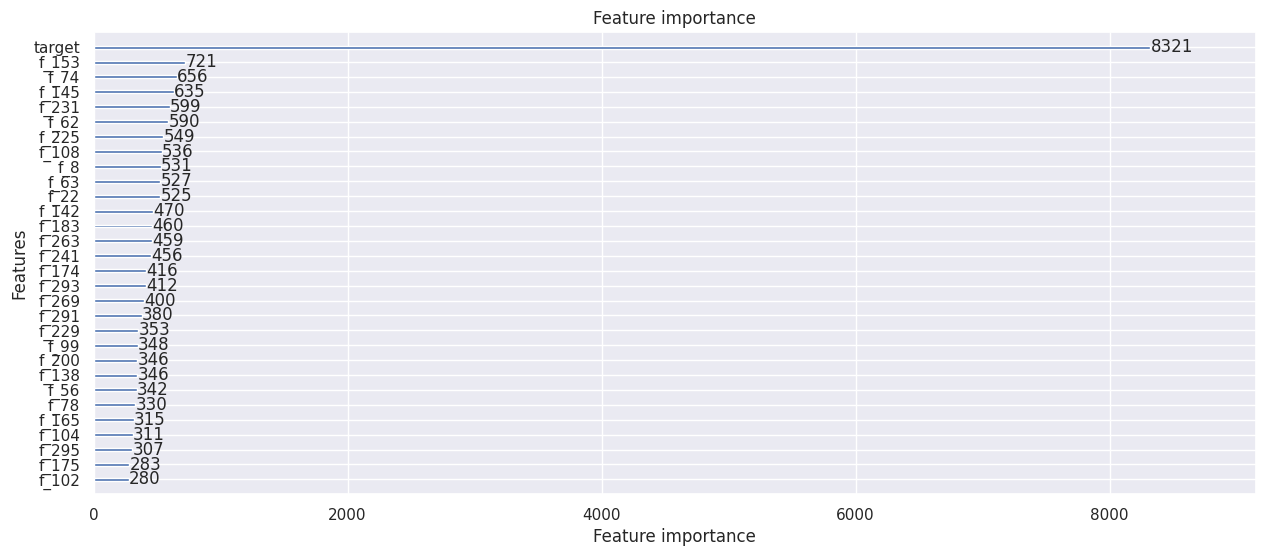

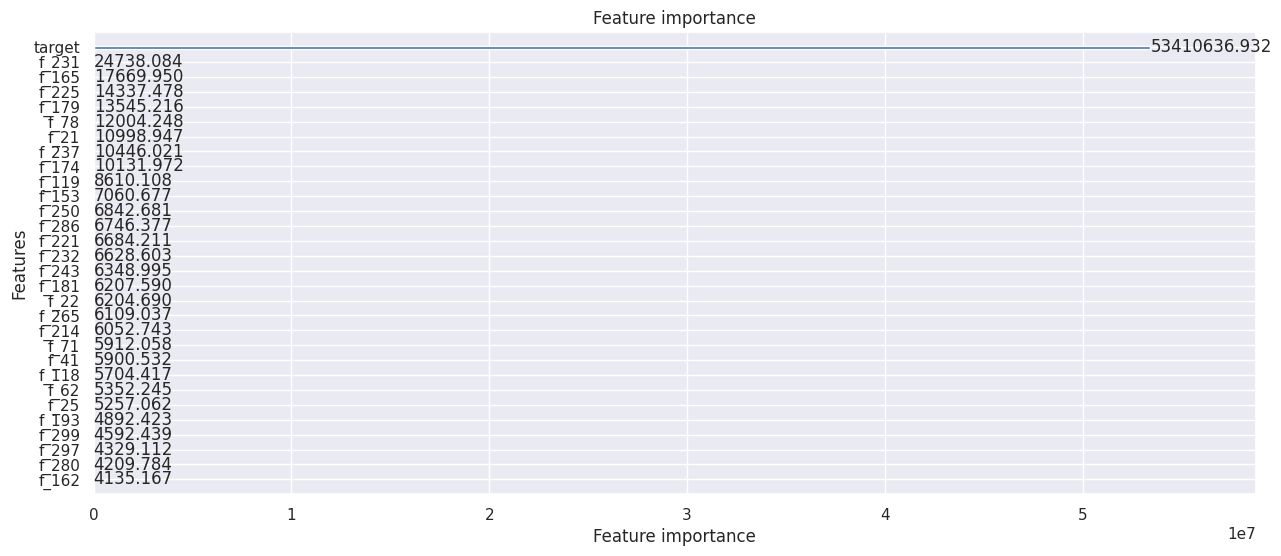

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[20]	training's rmse: 0.85902	training's pearsonr: 0.860363
[40]	training's rmse: 0.850385	training's pearsonr: 0.805354
[60]	training's rmse: 0.84908	training's pearsonr: 0.753565
[80]	training's rmse: 0.769546	training's pearsonr: 0.923938
[100]	training's rmse: 0.729196	training's pearsonr: 0.944801
[120]	training's rmse: 0.637771	training's pearsonr: 0.973519
[140]	training's rmse: 0.642776	training's pearsonr: 0.973887
[160]	training's rmse: 0.618283	training's pearsonr: 0.976503
[180]	training's rmse: 0.588193	training's pearsonr: 0.981063
[200]	training's rmse: 0.582983	training's pearsonr: 0.981929
[220]	training's rmse: 0.562616	training's pearsonr: 0.985122
[240]	training's rmse: 0.486889	training's pearsonr: 0.989644
[260]	training's rmse: 0.473274	training's pearsonr: 0.991118
[280]	training's rmse: 0.448187	training's pearsonr: 0.992284
[300]	training's rmse: 0.389168	training's pearsonr: 0.994237
[320]	training's rmse: 0.316671	training's pearsonr: 0.995962
[340]	training

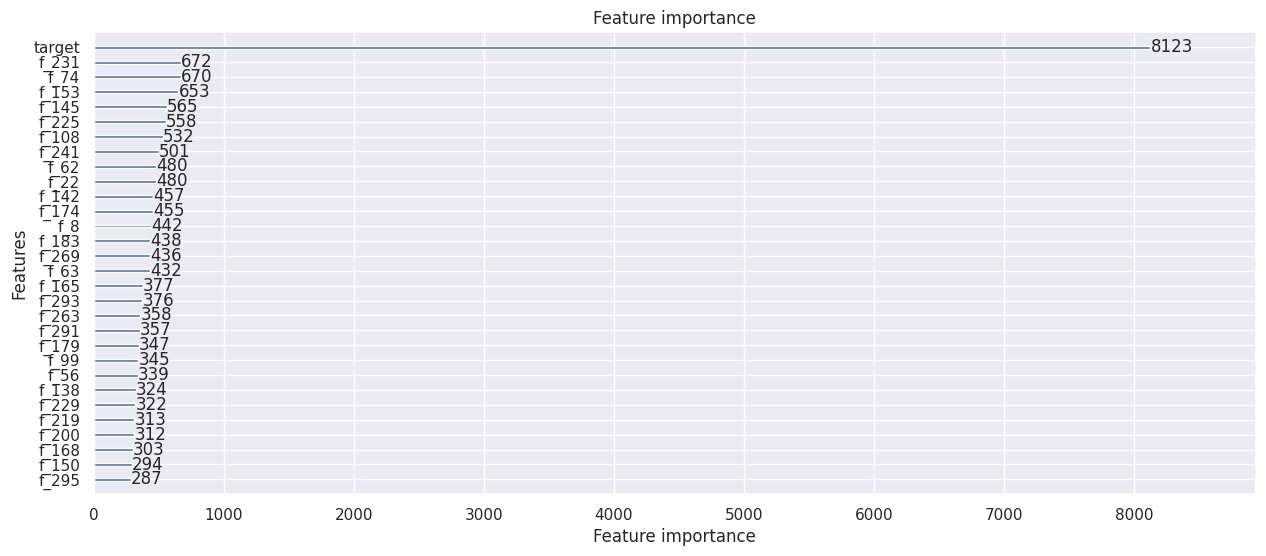

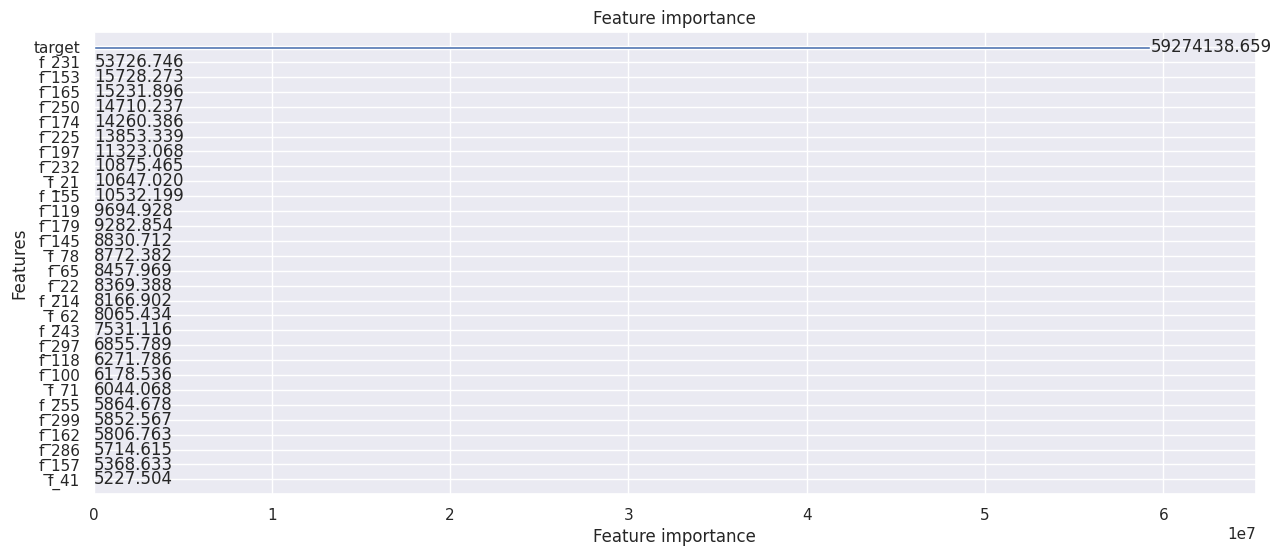

[20]	training's rmse: 0.827128	training's pearsonr: 0.954774
[40]	training's rmse: 0.788664	training's pearsonr: 0.938196
[60]	training's rmse: 0.684916	training's pearsonr: 0.972069
[80]	training's rmse: 0.587596	training's pearsonr: 0.98507
[100]	training's rmse: 0.54146	training's pearsonr: 0.988951
[120]	training's rmse: 0.553737	training's pearsonr: 0.988067
[140]	training's rmse: 0.545506	training's pearsonr: 0.989181
[160]	training's rmse: 0.502719	training's pearsonr: 0.991726
[180]	training's rmse: 0.479772	training's pearsonr: 0.992575
[200]	training's rmse: 0.483831	training's pearsonr: 0.992195
[220]	training's rmse: 0.363598	training's pearsonr: 0.995546
[240]	training's rmse: 0.336146	training's pearsonr: 0.996351
[260]	training's rmse: 0.304594	training's pearsonr: 0.996974
[280]	training's rmse: 0.246362	training's pearsonr: 0.997836
[300]	training's rmse: 0.23674	training's pearsonr: 0.998146
[320]	training's rmse: 0.235066	training's pearsonr: 0.998368
[340]	training'

In [ ]:
seeds = [2,11,23]
# seeds = [2,7,11,19,23]

for seed in seeds:
    _model_params = dict(model_params)
    _model_params["seed"] = seed 
    
    log_callback = lgb.log_evaluation(period=20) 
    
    model = lgb.train(
        params=_model_params, 
        train_set=train_dataset, 
        valid_sets=[train_dataset], 
        feval=pearsonr, 
        callbacks=[log_callback,], 
    )

    # model.save_model(f"lgbm_seed{seed}.txt")
    
    lgb.plot_importance(model, figsize=(15,6), importance_type="split", max_num_features=30) 
    lgb.plot_importance(model, figsize=(15,6), importance_type="gain", max_num_features=30) 
    plt.show()